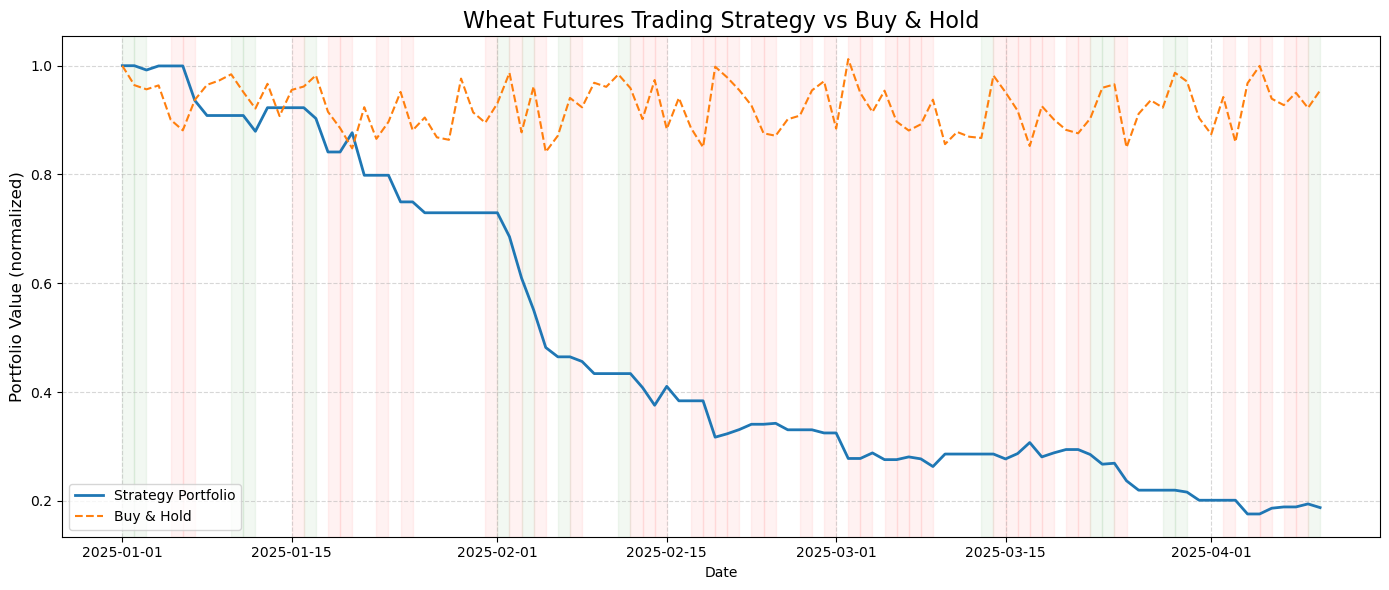

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Setup
np.random.seed(42)
days = 100
dates = pd.date_range(start="2025-01-01", periods=days)

# Simulated data
expected_planting = np.random.normal(100, 5, days)
actual_planting = expected_planting + np.random.normal(0, 5, days)
weather_index = np.random.uniform(0, 1, days)
demand_index = np.cumsum(np.random.normal(0, 0.5, days)) + 100

# Price simulation
base_price = 600
price = base_price + (
    (expected_planting - actual_planting) * 2 +
    (demand_index - np.mean(demand_index)) * 1.5 +
    (weather_index - 0.5) * 100
)

# Generate signals
signal = []
for i in range(days):
    if actual_planting[i] < expected_planting[i] and weather_index[i] > 0.5 and demand_index[i] > demand_index[i-1]:
        signal.append(1)  # Long
    elif actual_planting[i] > expected_planting[i] and (weather_index[i] < 0.5 or demand_index[i] < demand_index[i-1]):
        signal.append(-1)  # Short
    else:
        signal.append(0)  # Hold

# Strategy returns
position = pd.Series(signal).shift(1).fillna(0)
returns = pd.Series(price).pct_change().fillna(0)
strategy_returns = position * returns
portfolio = (1 + strategy_returns).cumprod()
buy_and_hold = (1 + returns).cumprod()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(dates, portfolio, label='Strategy Portfolio', linewidth=2)
plt.plot(dates, buy_and_hold, label='Buy & Hold', linestyle='--', linewidth=1.5)

# Highlight buy/sell zones
for i in range(1, days):
    if signal[i] == 1:
        plt.axvspan(dates[i-1], dates[i], color='green', alpha=0.05)
    elif signal[i] == -1:
        plt.axvspan(dates[i-1], dates[i], color='red', alpha=0.05)

# Titles and legend
plt.title("Wheat Futures Trading Strategy vs Buy & Hold", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Portfolio Value (normalized)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()